In [7]:
#import labs we need:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

## Read data from csv file
We read the data from the weight dataset.csv file and put it in a data frame named dataset.

In [18]:

#read datas from dataset:
dataset = pd.read_csv('https://raw.githubusercontent.com/QueraTeam/college-ml/main/ML_intro/6-%20machine%20learning%20in%20practice/weight_dataset.csv')

## Change the data unit
We converted weight to kilograms and height to centimeters. This work does not affect the training and performance of the model and is only done so that we can better understand the data.

In [9]:
dataset['Height']= dataset.Height.apply(lambda val : 2.54*val)
dataset['Weight']= dataset.Weight.apply(lambda val: 0.45359237*val)

In [10]:
#show datas:
dataset.head(10)
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228114
std,9.772721,14.564143
min,137.828359,29.347484
25%,161.304276,61.606032
50%,168.447898,73.124954
75%,175.702625,84.898668
max,200.656806,122.465267


## Data visualization
To better understand the data, let's examine how much people's weight changes based on their height changes. In other words, we want to understand how much increasing or decreasing height affects weight gain or loss. Let's do this chart by gender!

For this purpose, we draw a scatter plot of the data. 

<AxesSubplot:xlabel='Height', ylabel='Weight'>

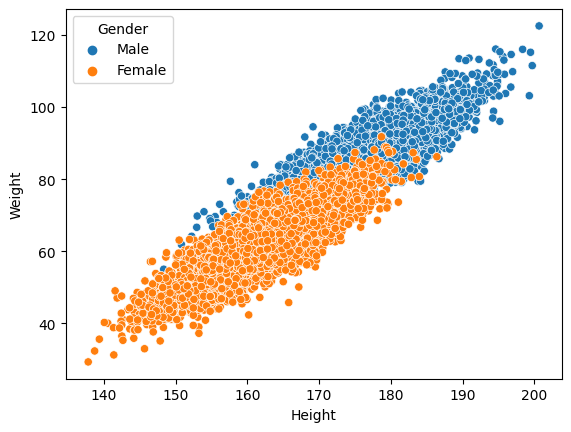

In [11]:
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=dataset)


In [12]:
#change values of gender:
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)

## Creating training and testing data
We separated 20% of the data as test data; The remaining 80% will be used in model training.

In [13]:
x_train,x_test, y_train,y_test = train_test_split(dataset.drop('Weight',axis=1), dataset.Weight, test_size=0.2, random_state=101)


In [14]:
regressor = XGBRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [15]:
print(f'MAE = {mean_absolute_error(y_test,y_pred)}')


MAE = 3.848802091903812


In [16]:
print(f'XG Boost Regressor is about {round(regressor.score(x_test,y_test)*100)}% accurate!')


XG Boost Regressor is about 89% accurate!


### Attention
This code sample is only to show a summary of the steps that are taken for a machine learning project and it is not expected that you will be able to understand all parts of it with the knowledge you have gained from this course. So if you don't understand a part of it, it's okay; In the future courses of Quera artificial intelligence and machine learning, we will explain the concepts used in detail!

### refrences:

- https://quera.org/college/8522/chapter/30419/lesson/100177/?comments_page=1&comments_filter=ALL
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html